In [781]:
import os
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [782]:
numCH = [None]*200
with open("Log-clusters.txt") as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    count = 0
    for row in data:
        numCH[count] = len(row)
        count = count+1
        for i in range(0,len(row)):
            row[i] = int(row[i])

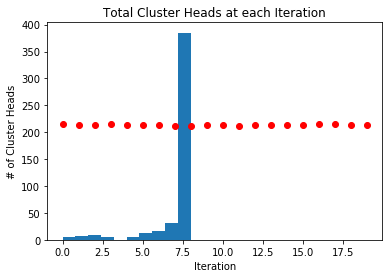

In [783]:
t = range(200)
plt.plot(t, numCH, 'ro')
plt.title("Total Cluster Heads at each Iteration")
plt.xlabel("Iteration")
plt.ylabel("# of Cluster Heads")
plt.show()

In [784]:
plt.figure()

def update_hist(num):
    plt.cla()
    plt.hist(data[num])
    plt.xlabel("Cluster Size")
    plt.ylabel("Frequency")
    plt.title("Cluster Sizes at T="+str(num))
    
fig = plt.figure()
hist = plt.hist(data[0])

In [785]:
num =0
animation = animation.FuncAnimation(fig, update_hist, 20, fargs=(num) )
HTML(animation.to_html5_video())

In [786]:
count = 0
total_nodes = 1500
print("Iteration\t\t    ClusterSize Freq\t\t\tNodes in Cluster\tCluster Heads\t  No Cluster")
#print("\t         \t    0   1   2   3   4   5   6   7   8")
for row in data:
    
    cluster_nodes = 0
    cluster_heads = 0
    count_array = np.bincount(row) 
    for i in range(0,len(count_array)):
        cluster_heads = cluster_heads + count_array[i]
        cluster_nodes = cluster_nodes + count_array[i]*(i+1)
    
    print("  ",count,"\t\t",np.bincount(row),"\t\t    ",cluster_nodes-cluster_heads,"\t\t  ",cluster_heads,"\t\t   ",total_nodes-cluster_nodes)
    count = count+1

Iteration		    ClusterSize Freq			Nodes in Cluster	Cluster Heads	  No Cluster
   0 		 [ 17  15   7  12   8   9  14   5 128] 		     1285 		   215 		    0
   1 		 [ 16  14   7  11   9   9  13   5 129] 		     1287 		   213 		    0
   2 		 [ 17  12  11  10   8  10  11   6 129] 		     1286 		   214 		    0
   3 		 [ 16  13  11  11  10  10   9   7 128] 		     1285 		   215 		    0
   4 		 [ 14  13  13  10   9  13   6   8 128] 		     1286 		   214 		    0
   5 		 [ 15  13  10  11   9  15   6   7 128] 		     1286 		   214 		    0
   6 		 [ 14  13   9  12  10  12   9   6 128] 		     1287 		   213 		    0
   7 		 [ 12  13   9  12   7  16   8   6 128] 		     1289 		   211 		    0
   8 		 [ 13  11  10  13   7  19   6   5 128] 		     1288 		   212 		    0
   9 		 [ 15   9  12  13   8  17   3   8 128] 		     1287 		   213 		    0
   10 		 [ 15   9  12  13   8  17   3   8 128] 		     1287 		   213 		    0
   11 		 [ 15   9  11  11   8  19   4   7 128] 		     1288 		   212 		    0
   12 		 [ 18   8  1